In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Hamoye_capstone_project_smote/Data/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Hamoye_capstone_project_smote/Data/test'

In [3]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [4]:
for layer in vgg16.layers:
    layer.trainable = False

In [5]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Hamoye_capstone_project_smote/Data/train/*')

In [6]:
folders

['/content/drive/MyDrive/Colab Notebooks/Hamoye_capstone_project_smote/Data/train/Buffalo',
 '/content/drive/MyDrive/Colab Notebooks/Hamoye_capstone_project_smote/Data/train/Elephant',
 '/content/drive/MyDrive/Colab Notebooks/Hamoye_capstone_project_smote/Data/train/Zebra',
 '/content/drive/MyDrive/Colab Notebooks/Hamoye_capstone_project_smote/Data/train/Rhino']

In [7]:
x = Flatten()(vgg16.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Hamoye_capstone_project_smote/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7556 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Hamoye_capstone_project_smote/Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1084 images belonging to 4 classes.


In [13]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
237/237 [==============================] - 1348s 6s/step - loss: 0.3685 - accuracy: 0.8612 - val_loss: 0.1820 - val_accuracy: 0.9400
Epoch 2/20
237/237 [==============================] - 157s 661ms/step - loss: 0.1711 - accuracy: 0.9377 - val_loss: 0.2140 - val_accuracy: 0.9197
Epoch 3/20
237/237 [==============================] - 159s 671ms/step - loss: 0.1289 - accuracy: 0.9549 - val_loss: 0.1115 - val_accuracy: 0.9640
Epoch 4/20
237/237 [==============================] - 159s 671ms/step - loss: 0.1031 - accuracy: 0.9652 - val_loss: 0.0890 - val_accuracy: 0.9723
Epoch 5/20
237/237 [==============================] - 159s 670ms/step - loss: 0.1112 - accuracy: 0.9592 - val_loss: 0.1213 - val_accuracy: 0.9557
Epoch 6/20
237/237 [==============================] - 157s 662ms/step - loss: 0.0903 - accuracy: 0.9663 - val_loss: 0.2371 - val_accuracy: 0.9197
Epoch 7/20
237/237 [==============================] - 157s 660ms/step - loss: 0.0749 - accuracy: 0.9708 - val_loss: 0.1134 - v

In [14]:
_, acc = model.evaluate(test_set, steps=len(test_set), verbose=0)
print('Accuracy: %.3f' % (acc * 100.0))

Accuracy: 94.742


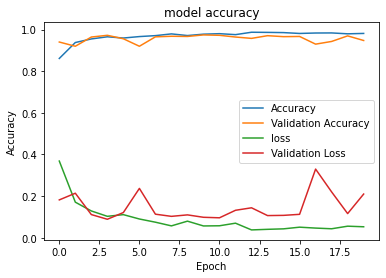

In [15]:
import matplotlib.pyplot as plt
plt.plot(r.history["accuracy"])
plt.plot(r.history['val_accuracy'])
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [16]:
y_val = test_set.classes

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(test_set, verbose=0)


print(classification_report( y_val, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.21      0.20      0.20       271
           1       0.27      0.24      0.25       271
           2       0.21      0.24      0.22       271
           3       0.25      0.25      0.25       271

    accuracy                           0.23      1084
   macro avg       0.23      0.23      0.23      1084
weighted avg       0.23      0.23      0.23      1084



In [18]:
import pickle
pickle.dump(model, open("vgg16.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://de8fcf28-980a-4a3b-9217-98cf0ff41f5f/assets
